# Chapter 8. Data Wrangling: Join, Combine, and Reshape

## 8.1 Hierarchical Indexing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.Series(np.random.uniform(size=9), index=[["a", "a", "a", "b", "b", "c", "c", "d", "d"], [1, 2, 3, 1, 3, 1, 2, 2, 3]])
data

a  1    0.830038
   2    0.367697
   3    0.458946
b  1    0.853772
   3    0.067174
c  1    0.967201
   2    0.412418
d  2    0.872939
   3    0.586719
dtype: float64

In [3]:
data.index

MultiIndex([('a', 1),
            ('a', 2),
            ('a', 3),
            ('b', 1),
            ('b', 3),
            ('c', 1),
            ('c', 2),
            ('d', 2),
            ('d', 3)],
           )

In [4]:
# Index a subset of data.
data["b"]

1    0.853772
3    0.067174
dtype: float64

In [5]:
data["b":"c"]

b  1    0.853772
   3    0.067174
c  1    0.967201
   2    0.412418
dtype: float64

In [6]:
data.loc[["b","d"]]

b  1    0.853772
   3    0.067174
d  2    0.872939
   3    0.586719
dtype: float64

In [7]:
# Give me all the letters with index 2's.
data.loc[:, 2]

a    0.367697
c    0.412418
d    0.872939
dtype: float64

In [8]:
data.unstack()

,1,2,3
a,0.830038,0.367697,0.458946
b,0.853772,NaN,0.067174
c,0.967201,0.412418,NaN
d,NaN,0.872939,0.586719


In [9]:
data.unstack().stack()

a  1    0.830038
   2    0.367697
   3    0.458946
b  1    0.853772
   3    0.067174
c  1    0.967201
   2    0.412418
d  2    0.872939
   3    0.586719
dtype: float64

In [10]:
data

a  1    0.830038
   2    0.367697
   3    0.458946
b  1    0.853772
   3    0.067174
c  1    0.967201
   2    0.412418
d  2    0.872939
   3    0.586719
dtype: float64

In [11]:
frame = pd.DataFrame(np.arange(12).reshape((4, 3)),
....: index=[["a", "a", "b", "b"], [1, 2, 1, 2]],
....: columns=[["Ohio", "Ohio", "Colorado"],
....: ["Green", "Red", "Green"]])

In [12]:
frame

Ohio     Colorado
    Green Red    Green
a 1     0   1        2
  2     3   4        5
b 1     6   7        8
  2     9  10       11

In [13]:
frame.index.names = ["key1", "key2"]
frame.columns.names = ["state", "color"]
frame

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

In [14]:
frame.index.nlevels

2

In [15]:
frame["Ohio"]

color      Green  Red
key1 key2            
a    1         0    1
     2         3    4
b    1         6    7
     2         9   10

In [16]:
frame.swaplevel("key1", "key2")

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
2    a        3   4        5
1    b        6   7        8
2    b        9  10       11

In [17]:
frame

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

In [18]:
frame.sort_index(level=1)

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
b    1        6   7        8
a    2        3   4        5
b    2        9  10       11

In [19]:
frame.swaplevel(0, 1).sort_index(level=0)

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
     b        6   7        8
2    a        3   4        5
     b        9  10       11

In [20]:
frame.groupby(level="key2").sum()

state  Ohio     Colorado
color Green Red    Green
key2                    
1         6   8       10
2        12  14       16

In [21]:
frame = pd.DataFrame({"a": range(7), "b": range(7, 0, -1),
....: "c": ["one", "one", "one", "two", "two",
....: "two", "two"],
....: "d": [0, 1, 2, 0, 1, 2, 3]})
frame

,a,b,c,d
0,0,7,one,0
1,1,6,one,1
2,2,5,one,2
3,3,4,two,0
4,4,3,two,1
5,5,2,two,2
6,6,1,two,3


In [22]:
frame2 = frame.set_index(["c", "d"])
frame2

a  b
c   d      
one 0  0  7
    1  1  6
    2  2  5
two 0  3  4
    1  4  3
    2  5  2
    3  6  1

In [23]:
frame.set_index(["c", "d"], drop=False)

a  b    c  d
c   d              
one 0  0  7  one  0
    1  1  6  one  1
    2  2  5  one  2
two 0  3  4  two  0
    1  4  3  two  1
    2  5  2  two  2
    3  6  1  two  3

In [24]:
frame2.reset_index()

,c,d,a,b
0,one,0,0,7
1,one,1,1,6
2,one,2,2,5
3,two,0,3,4
4,two,1,4,3
5,two,2,5,2
6,two,3,6,1


## 8.2 Combining and Merging Datasets

In [26]:
# Merge or Join link the datasets together based on one of more keys.
df1 = pd.DataFrame({"key": ["b", "b", "a", "c", "a", "a", "b"], "data1": pd.Series(range(7), dtype="Int64")})
df2 = pd.DataFrame({"key": ["a", "b", "d"], "data2": pd.Series(range(3), dtype="Int64")})

In [27]:
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [28]:
df2

,key,data2
0,a,0
1,b,1
2,d,2


In [30]:
# Many to one join
pd.merge(df1, df2)

,key,data1,data2
0,b,0,1
1,b,1,1
2,a,2,0
3,a,4,0
4,a,5,0
5,b,6,1


In [31]:
# Better practice to explicitly specify which column to join on.
pd.merge(df1, df2, on="key")

,key,data1,data2
0,b,0,1
1,b,1,1
2,a,2,0
3,a,4,0
4,a,5,0
5,b,6,1


In [32]:
df3 = pd.DataFrame({"lkey": ["b", "b", "a", "c", "a", "a", "b"], "data1": pd.Series(range(7), dtype="Int64")})
df4 = pd.DataFrame({"rkey": ["a", "b", "d"], "data2": pd.Series(range(3), dtype="Int64")})

In [33]:
df3

,lkey,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [34]:
df4

,rkey,data2
0,a,0
1,b,1
2,d,2


In [35]:
# Can specify the column names separately if the names aren't the same in different data frames.
pd.merge(df3, df4, left_on="lkey", right_on="rkey")

,lkey,data1,rkey,data2
0,b,0,b,1
1,b,1,b,1
2,a,2,a,0
3,a,4,a,0
4,a,5,a,0
5,b,6,b,1


In [36]:
# By default merge does inner join which is what is common among both. We can do outer, left, right join.
pd.merge(df1, df2, how="outer")

,key,data1,data2
0,a,2,0
1,a,4,0
2,a,5,0
3,b,0,1
4,b,1,1
5,b,6,1
6,c,3,<NA>
7,d,<NA>,2


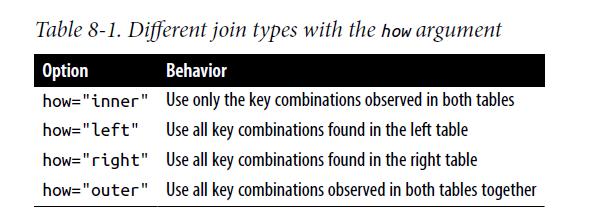

In [37]:
df1 = pd.DataFrame({"key": ["b", "b", "a", "c", "a", "b"], "data1": pd.Series(range(6), dtype="Int64")})
df2 = pd.DataFrame({"key": ["a", "b", "a", "b", "d"], "data2": pd.Series(range(5), dtype="Int64")})

In [38]:
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [39]:
df2

,key,data2
0,a,0
1,b,1
2,a,2
3,b,3
4,d,4


In [40]:
pd.merge(df1, df2, on="key", how="left")

,key,data1,data2
0,b,0,1
1,b,0,3
2,b,1,1
3,b,1,3
4,a,2,0
5,a,2,2
6,c,3,<NA>
7,a,4,0
8,a,4,2
9,b,5,1


In [41]:
pd.merge(df1, df2, how="inner")

,key,data1,data2
0,b,0,1
1,b,0,3
2,b,1,1
3,b,1,3
4,a,2,0
5,a,2,2
6,a,4,0
7,a,4,2
8,b,5,1
9,b,5,3


In [42]:
# For column names with the same name, you can do the suffixes=("_left", "_right")

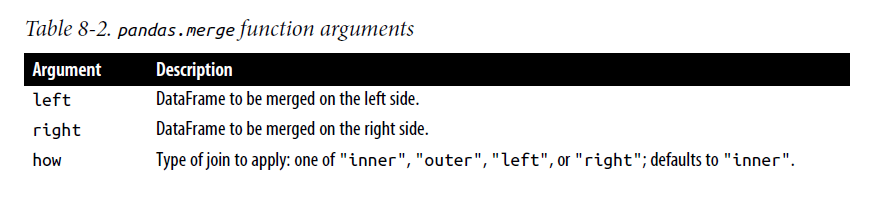

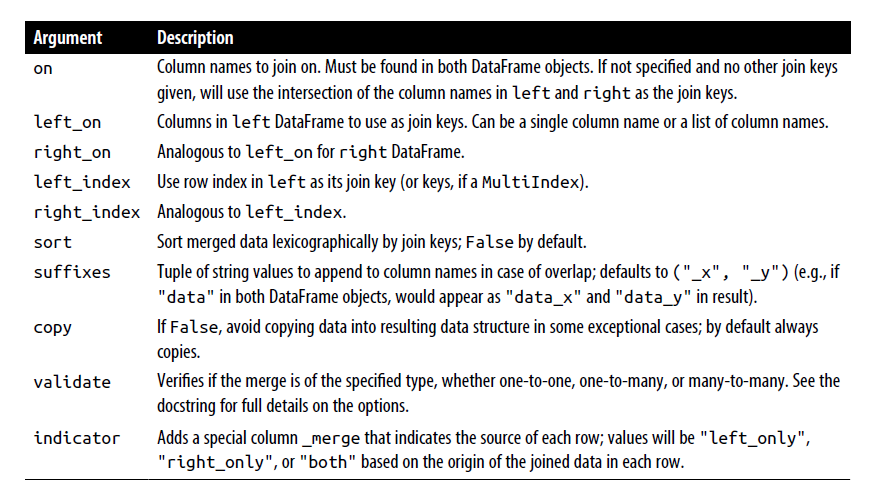